# Time Series Project Analysis

- The First Step in the project is to sort the TimeStamps.
- There could be some date that contains missing / abnormal data (Outliers / NaN values)
- The Missing values (NaN) can be resolved by Imputations (Forward Fill / Backward Fill)
- Outliers are the White Noise then We smooth the data.
- Plot the data / Data Visualization for Human Readability and Understanding.
- Find the Patterns from the Plot (Trend, Seasonality, Cycles, Residue)
    - Extensive use of StatsModel For (ETS Decomposition of T.S Data)
- Check where the Data Points are Stationary (Stationarity).
    1. Augmented Dickay Fuller Test (ADF Test)
        - Tells where the data hasn't changed.
    2. KPSS Test (Stationarity of the Trend) [Kwiatkowsli Phllips Schmidt Shin Test]
    3. Phillips Perron Test (PP Test)
- Deseasonalizing the Time Series data
    - Seasons are presumed Constant
- Autocorrelation of Time Series data.
- Lag
- Smooth the Data.

## Import the Libraries and The Dataset

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Import the Dataset
df = pd.read_csv("AirPassengers.csv")
df.sample(5)

,Month,#Passengers
10,1949-11,104
72,1955-01,242
88,1956-05,318
26,1951-03,178
77,1955-06,315


## Data Preprocessing

In [7]:
# Change the Names of the Columns
df.columns = ['Months','Number of Passengers']
df.head()

,Months,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Plot the Time Series Data

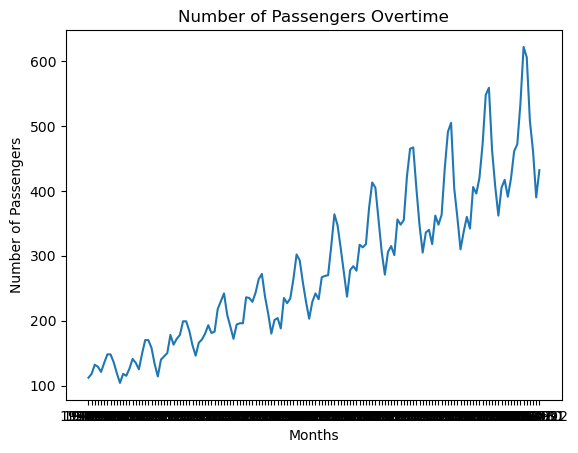

In [9]:
# plot the data using dns
sns.lineplot(x='Months', y='Number of Passengers', data=df)
plt.title("Number of Passengers Overtime")
plt.show()